# Підготовка до роботи та ознайомлення з набором 

Загружаю всі необхідні для роботи пакети:

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats.kde import gaussian_kde

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

Завантажую файл з даними в ноутбук:

In [2]:
df = pd.read_csv('project.xls')

Дивлюся інформацію по наявному датафрейму:

In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Бачу, що набір даних містить інформацію про 32561 об'єкт по 15 різним показникам без нявних пропусків.

Далі дивлюся перших 5 записів, щоб отримати уявлення про представлення даних.

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Виділяю дані про людей, які заробляють більше 50К доларів.

In [6]:
df[df['income'] != '<=50K'].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


Змінюю представлення даних в колонці "income" для полегшення роботи.

In [7]:
dict_income = {label: idx for idx, label in enumerate(np.unique(df['income']))}
df['income'] = df['income'].map(dict_income)
df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Змінивши на більш зручне представлення заробітку подивимося на відсоткове відношення в даних.

In [8]:
print(f'''Кількість людей із заробітком менше 50К $: {np.round((df['income'].value_counts()[0]) / df.shape[0], 2) * 100}%.
Кількість людей із заробітком менше 50К $: {np.round((df['income'].value_counts()[1]) / df.shape[0], 2) * 100}%.''')

Кількість людей із заробітком менше 50К $: 76.0%.
Кількість людей із заробітком менше 50К $: 24.0%.


Далі необхідно попрацювати з пропущеними даними. У загальній інформації про датафрейм не було вказано, що є пропущені значення, однак можна замітити, що тут пропуски зображуються знаками питання (?), тому знаходимо скільки даних пропусків в кожному стовпці.

In [9]:
columns_list = df.columns
pass_amount = {}

for column in columns_list:
    pass_in_column = df[df[column] == '?'][column].count()
    pass_amount[column] = pass_in_column

print(pass_amount)

{'age': 0, 'workclass': 1836, 'fnlwgt': 0, 'education': 0, 'education.num': 0, 'marital.status': 0, 'occupation': 1843, 'relationship': 0, 'race': 0, 'sex': 0, 'capital.gain': 0, 'capital.loss': 0, 'hours.per.week': 0, 'native.country': 583, 'income': 0}


Видаляємо строки, де відсутня інформація в стовпцях.

In [10]:
df_cleaned = df[(df['workclass'] != '?') & 
                (df['occupation'] != '?') & 
                (df['native.country'] != '?')]

In [11]:
df_cleaned.shape

(30162, 15)

In [12]:
diff = df.shape[0] - df_cleaned.shape[0]

print(f"Кількість об'єктів зменшується на {diff}.\n\
Що становить {np.round(((diff / df.shape[0]) * 100), 2)}% від усіх заданих об'єктів.")

Кількість об'єктів зменшується на 2399.
Що становить 7.37% від усіх заданих об'єктів.


Бачимо, що набір зменшився на 2399 записів, що становить 7.37% усього набору.
Подивимось, яке співвідношення людей по двом цільовим показникам в очищеному наборі.

In [13]:
print(f'''Кількість людей із заробітком менше 50К $: {np.round((df_cleaned['income'].value_counts()[0]) / df_cleaned.shape[0], 2) * 100}%.
Кількість людей із заробітком менше 50К $: {np.round((df_cleaned['income'].value_counts()[1]) / df_cleaned.shape[0], 2) * 100}%.''')

Кількість людей із заробітком менше 50К $: 75.0%.
Кількість людей із заробітком менше 50К $: 25.0%.


Співвідношення після очищення суттєво незмінилося, тому можемо працювати з очищеними набором. 

Наступним є необхідність перевірки на дублікати. Для цього використовуємо надані пакетом pandas методи:

In [14]:
df_cleaned.duplicated().sum()

23

Бачимо, що є дані, які дублюються. Тому необхідно очищити набір від них. Знову же використовуємо для цього наявний арсенал пандасу:

In [15]:
df_cleaned = df_cleaned.drop_duplicates(keep="first")

In [16]:
df_cleaned.duplicated().sum()

0

Дивимося загальний опис набору, щоб побачити розподіл даних у кожному стовпці:

In [17]:
df_cleaned.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30139.000000,30139,3.013900e+04,30139,30139.000000,30139,30139,30139,30139,30139,30139.000000,30139.000000,30139.000000,30139,30139.000000
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22264,NaN,9834,NaN,14059,4034,12457,25912,20366,NaN,NaN,NaN,27487,NaN
mean,38.441720,NaN,1.897950e+05,NaN,10.122532,NaN,NaN,NaN,NaN,NaN,1092.841202,88.439928,40.934703,NaN,0.249046
std,13.131426,NaN,1.056586e+05,NaN,2.548738,NaN,NaN,NaN,NaN,NaN,7409.110596,404.445239,11.978753,NaN,0.432468
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.176275e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.784170e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,47.000000,NaN,2.376045e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


Зараз можемо побачити, що в деяких числох даних наявні викиди (наприклад в capital.gain). Тому необхідно візуалізувати дані та починати обробляти. Розпочну з років.

# Аналіз набору по стовпцям

Розпочинаємо з "age":

<AxesSubplot:>

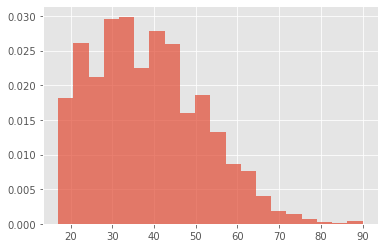

In [18]:
df_cleaned['age'].hist(bins=20, density=True, alpha=0.7)

In [19]:
def kde_image(column_name):
    density = gaussian_kde(df_cleaned[column_name])
    x = np.linspace(df_cleaned[column_name].min(), df_cleaned[column_name].max(), 1000)

    _ = plt.plot(x, density(x), color='green')
    plt.show()
    
def double_kde_image(column_name):
    density0 = gaussian_kde(df_cleaned[df_cleaned['income'] == 0][column_name])
    density1 = gaussian_kde(df_cleaned[df_cleaned['income'] == 1][column_name])
    
    minimum = min(df_cleaned[df_cleaned['income'] == 0][column_name].min(),
                 df_cleaned[df_cleaned['income'] == 1][column_name].min())
    maximum = max(df_cleaned[df_cleaned['income'] == 0][column_name].max(),
                 df_cleaned[df_cleaned['income'] == 1][column_name].max())
    
    x = np.linspace(minimum, maximum, 1000)

    _ = plt.plot(x, density0(x), color='red')
    _ = plt.plot(x, density1(x), color='blue')
    plt.show()

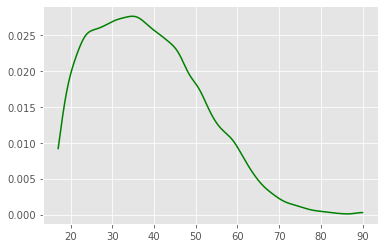

In [20]:
kde_image('age')

Візуально розприділення по рокам не схоже на нормальне. Спробуємо поділити залежно від цільового показника.

In [21]:
def hist_image(column_name, bins):
    colors = ['red', 'blue']

    for k, v in dict_income.items():
        _ = plt.hist(df_cleaned[df_cleaned['income'] == v][column_name], bins=bins, density=True, alpha=0.6, label=k)
        plt.axvline(df_cleaned[df_cleaned['income'] == v][column_name].mean(), alpha = 0.6, linestyle='dashed', color = colors[v])
        plt.legend()
        plt.xlabel(column_name)
        plt.ylabel('amount')

    plt.show()

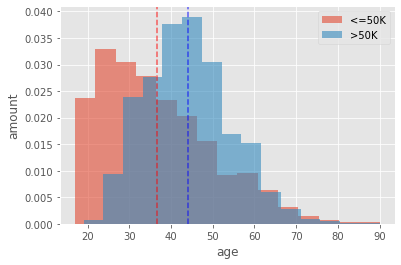

In [22]:
hist_image('age', 15)

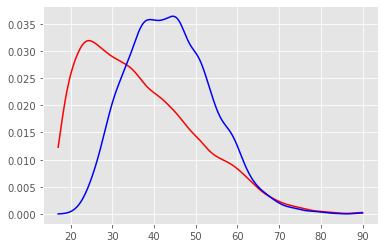

In [23]:
double_kde_image('age')

Спробуємо подивитися через box plot:

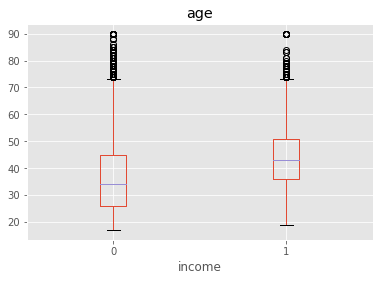

In [24]:
ax = df_cleaned.boxplot(column='age', by='income')
_ = ax.get_figure().suptitle('')

Перевіримо чи однакові розподіли мають дві вибірки. Для цього використаємо критерій Манна-Уітні.

In [25]:
def mann_whitneyu(column_name):
    x0 = df_cleaned[df_cleaned['income'] == 0].groupby(column_name)['income'].count().values
    x1 = df_cleaned[df_cleaned['income'] == 1].groupby(column_name)['income'].count().values

    res_mann_wh = stats.mannwhitneyu(x0, x1)
    print(f'p-value: {res_mann_wh[1]}.')

In [26]:
mann_whitneyu('age')

p-value: 4.966815651573901e-06.


По значенню p-value відхиляємо гіпотезу про подібність двох розподілів та говоримо, що вибірки мають різні розподіли.

Перевіримо гіпотезу про середнє значення обох вибірок:

In [27]:
def ranksums(column_name):
    x0 = df_cleaned[df_cleaned['income'] == 0].groupby(column_name)['income'].count().values
    x1 = df_cleaned[df_cleaned['income'] == 1].groupby(column_name)['income'].count().values

    res_ranksum = stats.ranksums(x0, x1)
    print(f'p-value: {res_ranksum[1]}.')

In [28]:
ranksums('age')

p-value: 9.850793807452426e-06.


Результат свідчить про статистично значиму різницю середніх значень.

Далі переходимо до стовпця "workclass":

In [29]:
def barh_image(column_name, fig_x, fig_y):
    fig, ax = plt.subplots(2, 1, figsize=(fig_x, fig_y))

    y0 = df_cleaned[df_cleaned['income'] == 0][column_name].value_counts().index
    y1 = df_cleaned[df_cleaned['income'] == 1][column_name].value_counts().index
    
    w0 = (df_cleaned[df_cleaned['income'] == 0][column_name].value_counts().values / df_cleaned[df_cleaned['income'] == 0].shape[0]) * 100
    w1 = (df_cleaned[df_cleaned['income'] == 1][column_name].value_counts().values / df_cleaned[df_cleaned['income'] == 1].shape[0]) * 100
    
    ax[0].set(title='"<=50K"')
    ax[0].barh(y=y0, width=w0)
    ax[0].set_xlabel('percent')
    
    ax[1].set(title='">50K"')
    ax[1].barh(y=y1, width=w1)
    ax[1].set_xlabel('percent')
    
    plt.tight_layout()
    plt.show()

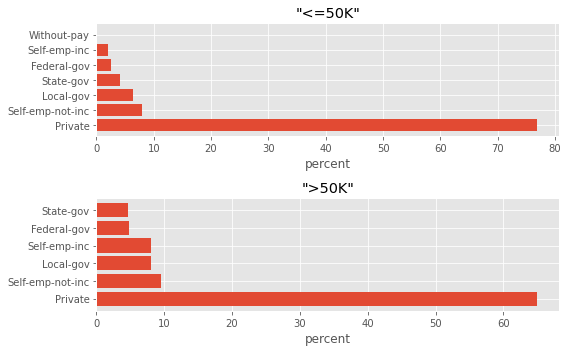

In [30]:
barh_image('workclass', 8, 5)

Спробуємо подивитися все на одному графіку:

In [31]:
def bar_image(column_name, max_val, fig_x, fig_y):
    labels = (df_cleaned[df_cleaned['income'] == 0][column_name].value_counts().sort_index().index | df_cleaned[df_cleaned['income'] == 1][column_name].value_counts().sort_index().index).to_list()
    
    labels_0 = df_cleaned[df_cleaned['income'] == 0][column_name].value_counts().sort_index().index
    labels_1 = df_cleaned[df_cleaned['income'] == 1][column_name].value_counts().sort_index().index
    
    pre_x0 = (df_cleaned[df_cleaned['income'] == 0][column_name].value_counts().sort_index().values / df_cleaned[df_cleaned['income'] == 0].shape[0]) * 100
    pre_x1 = (df_cleaned[df_cleaned['income'] == 1][column_name].value_counts().sort_index().values / df_cleaned[df_cleaned['income'] == 1].shape[0]) * 100
    
    x0 = []
    x1 = []
    
    n_x0 = 0
    n_x1 = 0
    
    for label in labels:
        if label in labels_0:
            x0.append(pre_x0[n_x0])
            n_x0 += 1
        else:
            x0.append(0)
        
        if label in labels_1:
            x1.append(pre_x1[n_x1])
            n_x1 += 1
        else:
            x1.append(0)
    
    x = np.arange(len(labels))
    width = 0.4
    
    fig, ax = plt.subplots(figsize=(fig_x, fig_y))

    rect1 = ax.bar(x - width/2, x0, width, label='"<=50K"')
    rect2 = ax.bar(x + width/2, x1, width, label='">50K"')
    
    for i in range(len(x)):
        plt.text(i, x0[i], np.round(x0[i], 2), ha = 'right', fontsize=fig_y)
        plt.text(i, x1[i], np.round(x1[i], 2), ha = 'left', fontsize=fig_y)
    
    ax.set_title(column_name.title())
    ax.set_ylabel('percent')
    
    plt.xticks(ticks = x, labels = labels, rotation = 'horizontal')
    plt.yticks([n for n in range(0, max_val, 1)])
    plt.legend()
    
    fig.tight_layout()
    
    plt.show()

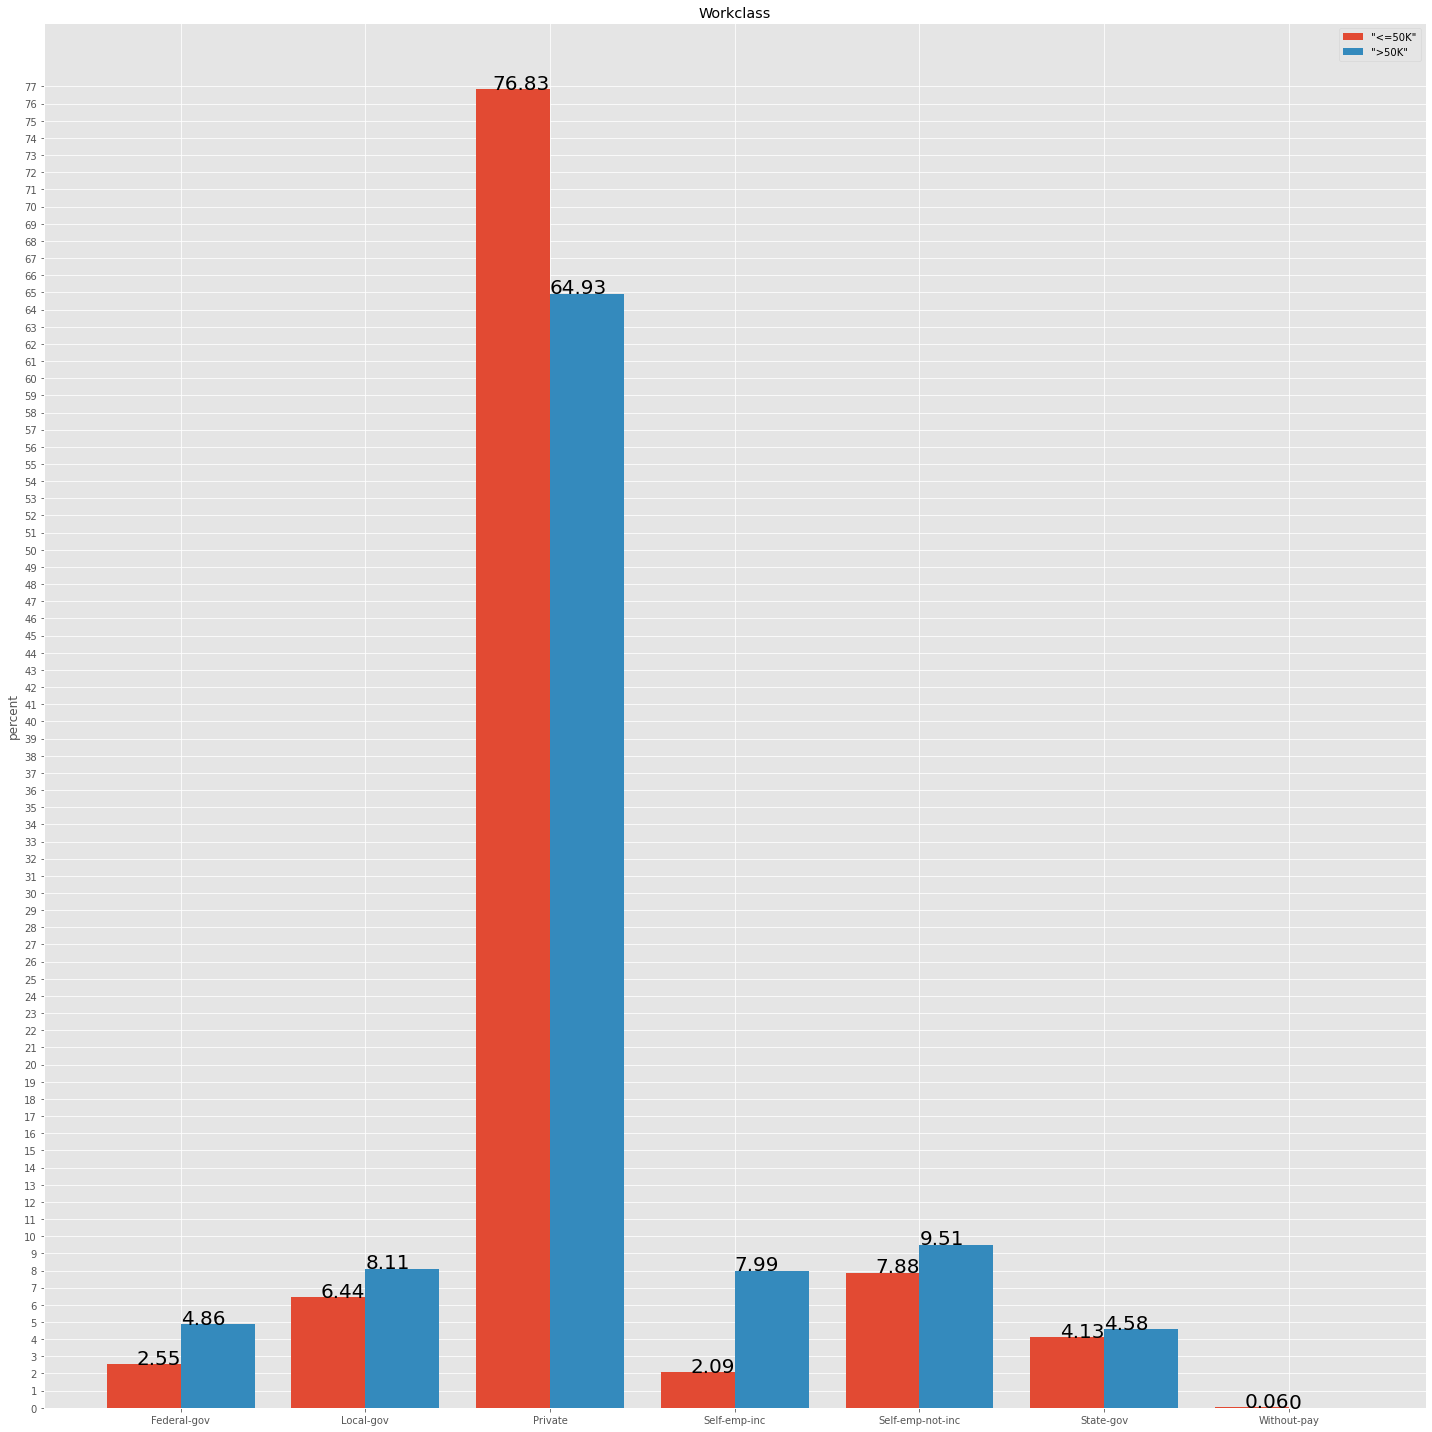

In [32]:
bar_image('workclass', 78, 20, 20)

In [33]:
x0 = df_cleaned[df_cleaned['income'] == 0]['workclass'].value_counts().index
x1 = df_cleaned[df_cleaned['income'] == 1]['workclass'].value_counts().index

inter = x0 & x1
not_inter = [wcl for wcl in x0 if wcl not in x1]

print(f'Категорії, які є в обох вибірках: {inter.to_list()}.\n')

print(f'Категорія, яка є тільки у вибірці 0: {not_inter}.')

Категорії, які є в обох вибірках: ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Self-emp-inc'].

Категорія, яка є тільки у вибірці 0: ['Without-pay'].


Спостерігається різниця між двома цільовими класами у всіх робочих класах.

Далі переходимо до "fnlwgt":

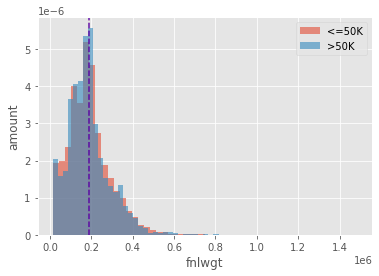

In [34]:
hist_image('fnlwgt', 50)

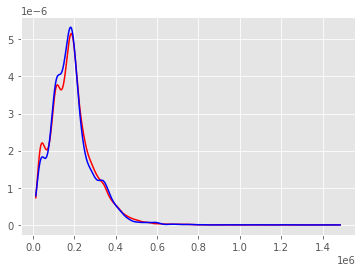

In [35]:
double_kde_image('fnlwgt')

По гістограмі можна відмітити, що наявна асиметричність розподілу для обох ознак. Тому можемо використати W-критерій Вілкоксона для порівняння двох вибірок.

In [36]:
x0 = df_cleaned[df_cleaned['income'] == 0]['fnlwgt']
x1 = df_cleaned[df_cleaned['income'] == 1]['fnlwgt']

res = stats.ranksums(x0, x1)
print(f'p-value: {res[1]}.')

p-value: 0.07996067175376413.


p-value > 0.05. Дві вибірки мають однаковий розподіл та статистично невідрізняються. Можна зробити висновок, що даний показник не впливатиме на прогнозування і його можна відкинути.
Також це підверджує інтуїтивне відчуття, щодо цього стовпця.

In [37]:
df_cleaned = df_cleaned.drop(columns='fnlwgt')

Переходимо до "education":

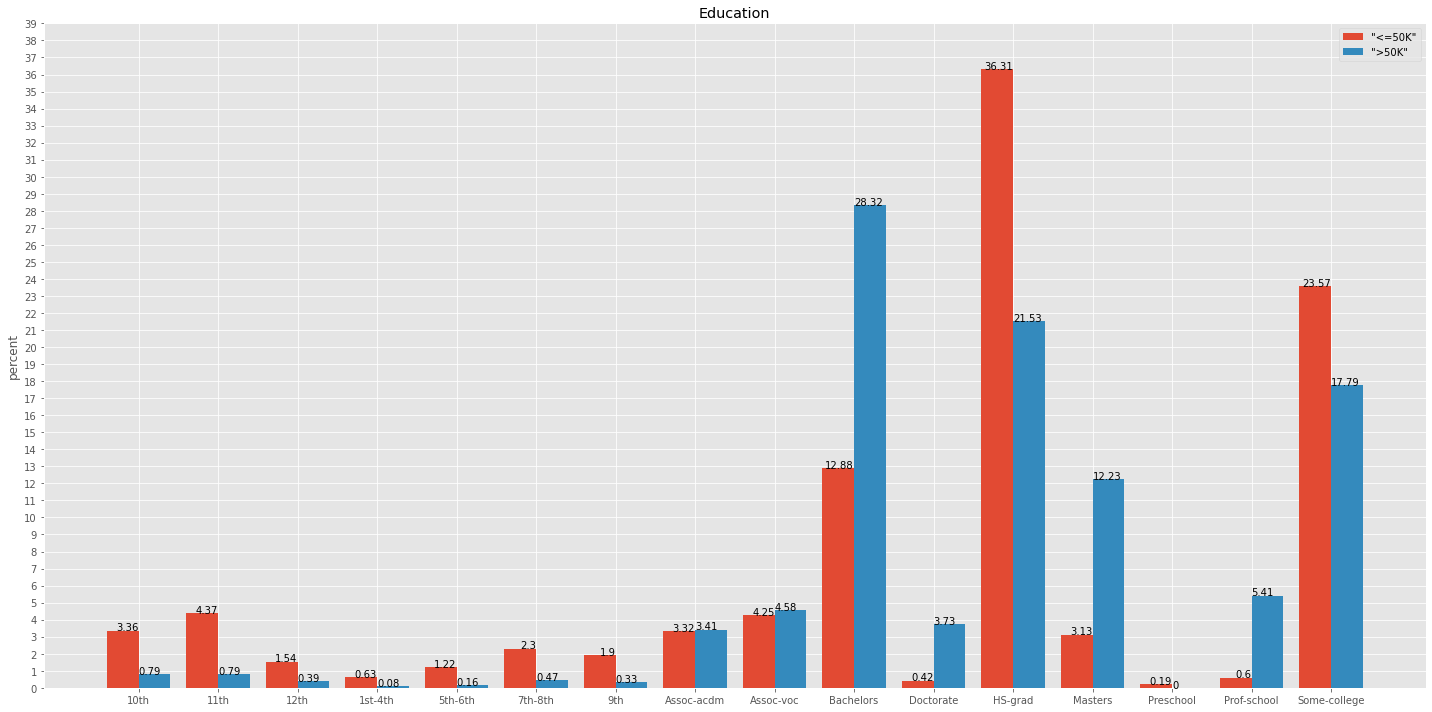

In [38]:
bar_image('education', 40, 20, 10)

По гістограмі видно, що деякі види освіти зустрічаються частіше в одному класі відносно іншого. Спробую їх об'єднати в окремий клас:

In [39]:
np.sort(df_cleaned['education'].unique())

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [40]:
lt0 = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Preschool']
lt1 = ['Prof-school', 'Doctorate']

def func(x):
    if x in lt0:
        return 'School'
    elif x in lt1:
        return 'Step'
    else:
        return x
        
df_cleaned['education'] = df_cleaned['education'].apply(func)
df_cleaned['education'].unique()

array(['HS-grad', 'School', 'Some-college', 'Step', 'Bachelors',
       'Masters', 'Assoc-voc', 'Assoc-acdm'], dtype=object)

In [41]:
df_cleaned['education']

1             HS-grad
3              School
4        Some-college
5             HS-grad
6              School
             ...     
32556    Some-college
32557      Assoc-acdm
32558         HS-grad
32559         HS-grad
32560         HS-grad
Name: education, Length: 30139, dtype: object

Також спостерігаємо значну різницю між рівнями освіти. Це може бути потрібним при прогнозуванні.

In [42]:
df_cleaned['education'].unique()

array(['HS-grad', 'School', 'Some-college', 'Step', 'Bachelors',
       'Masters', 'Assoc-voc', 'Assoc-acdm'], dtype=object)

Переходимо до "education.num":

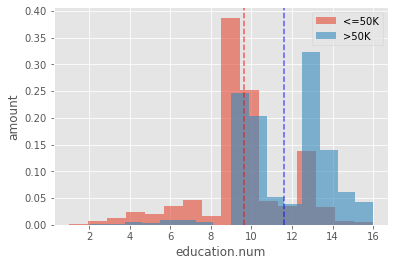

In [43]:
hist_image('education.num', 16)

In [44]:
lt = df_cleaned['education.num'].unique().tolist()
print(sorted(lt))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


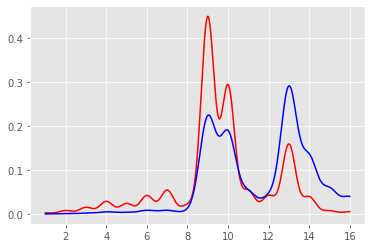

In [45]:
double_kde_image('education.num')

Зробимо інтервальну шкалу кількості освіт для зменшення дисперсії:

In [46]:
dict_edu_num = {(1, 2, 3): 1, (4, 5, 6): 2, (7, 8, 9, 10): 3, (11, 12, 13): 4, (14, 15, 16): 5}

def func(x):
    for k in dict_edu_num:
        if x in k:
            return dict_edu_num[k]

df_cleaned['education.num'] = df_cleaned['education.num'].apply(func)
df_cleaned['education.num'].head()

1    3
3    2
4    3
5    3
6    2
Name: education.num, dtype: int64

Спробуємо подивитися провірити гіпотезу про однаковість розподілу:

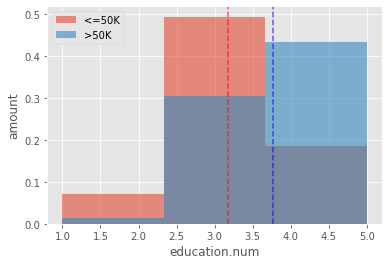

In [47]:
hist_image('education.num', 3)

In [48]:
mann_whitneyu('education.num')

p-value: 0.20169765244631416.


Можна побачити, що розподіл відрізняється. Тому показник можна використовувати для класифікації.

Перевіряємо гіпотезу на рівність середніх значень:

In [49]:
ranksums('education.num')

p-value: 0.34720763934942456.


Результат показує користь нульової гіпотези. Можна вважати середні значення рівними.

Добавлю новий парамет для покращення диференціювання класів.

In [50]:
df_cleaned['education.num'].unique()

array([3, 2, 5, 4, 1], dtype=int64)

In [51]:
df_cleaned['lvl_edu'] = df_cleaned['education.num'] / df_cleaned['age']

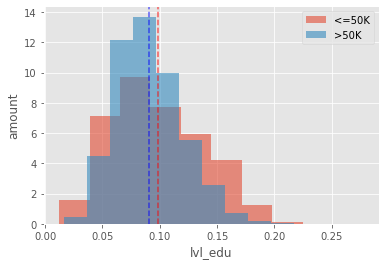

In [52]:
hist_image('lvl_edu', 10)

Цей показник свідчить про кількість освіт відносно віку (чим молодший об'єкт та чим більше має освіт, тим значення вище).

Заміжній статус:

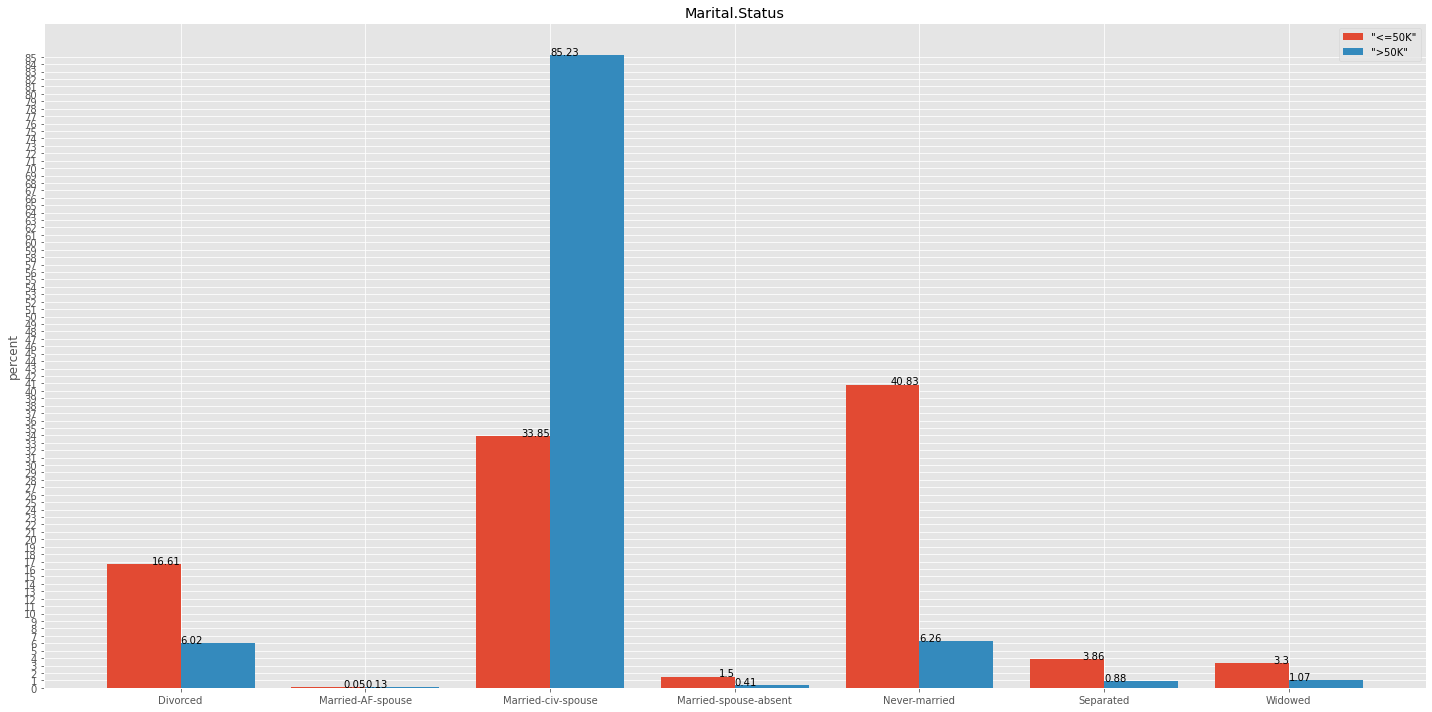

In [53]:
bar_image('marital.status', 86, 20, 10)

Різницю можна замітити (особливо виділяється "marries-civ-spouse")

Місце роботи:

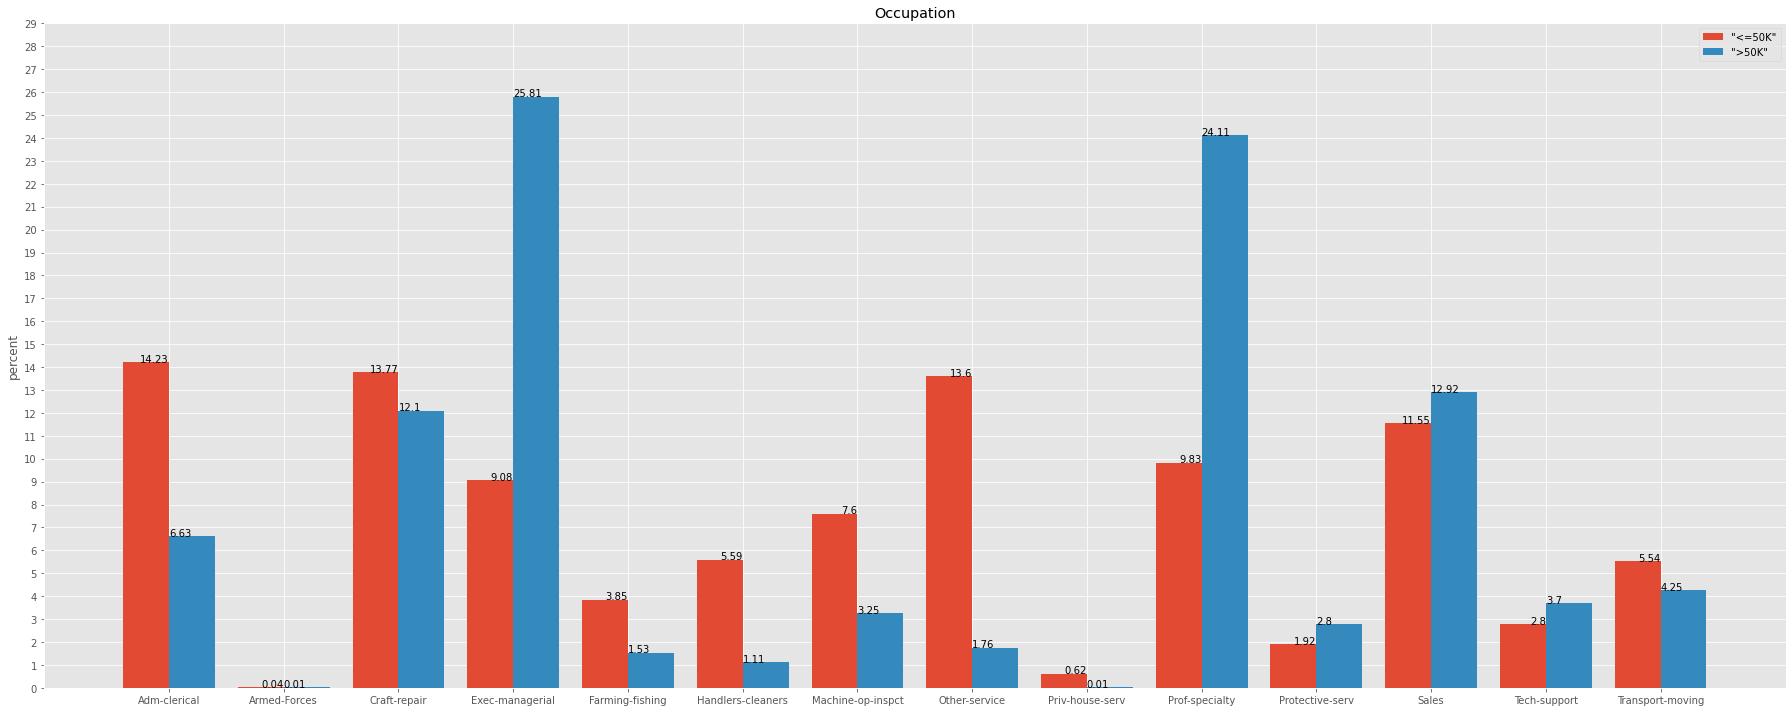

In [54]:
bar_image('occupation', 30, 25, 10)

З графіку видно, що різниця є.

"relationship":

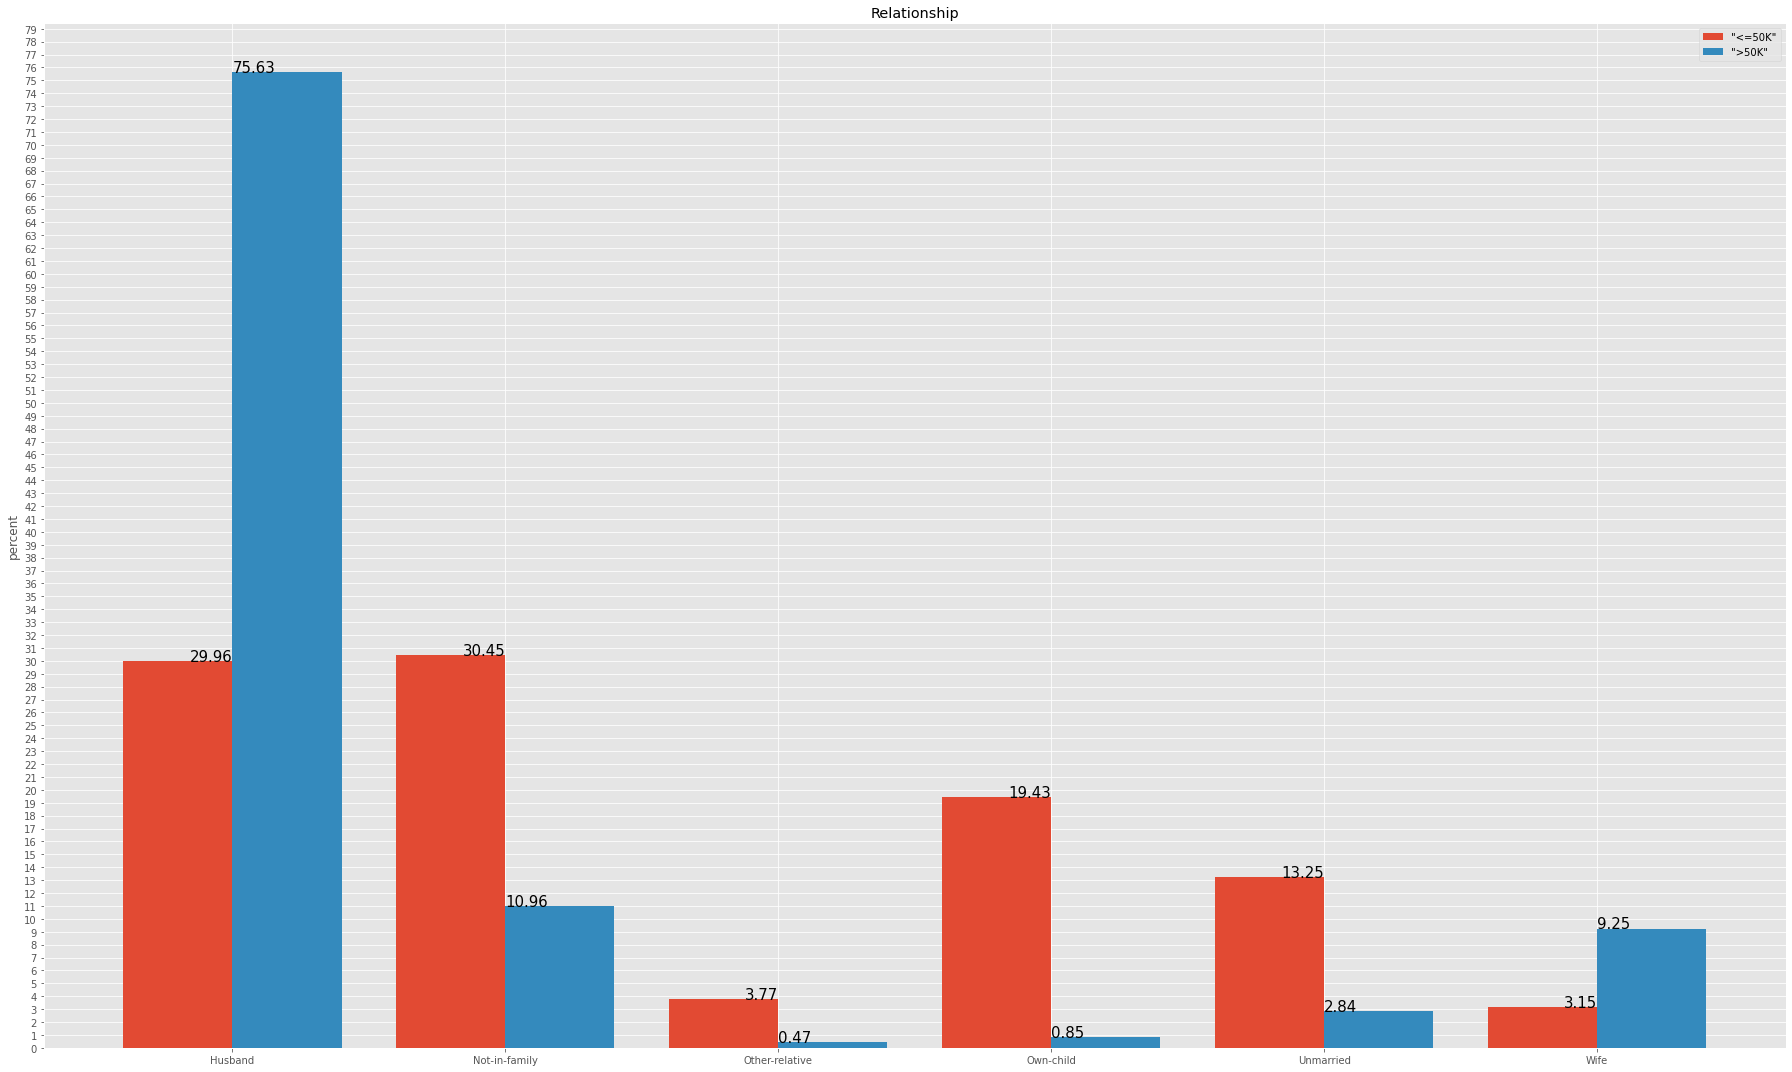

In [55]:
bar_image('relationship', 80, 25, 15)

In [56]:
np.sort(df_cleaned['relationship'].unique())

array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object)

In [57]:
lt0 = ['Other-relative', 'Own-child', 'Unmarried']

def func(x):
    if x in lt0:
        return 'Relative-child'
    else:
        return x
        
df_cleaned['relationship'] = df_cleaned['relationship'].apply(func)
df_cleaned['relationship'].unique()

array(['Not-in-family', 'Relative-child', 'Husband', 'Wife'], dtype=object)

"race":

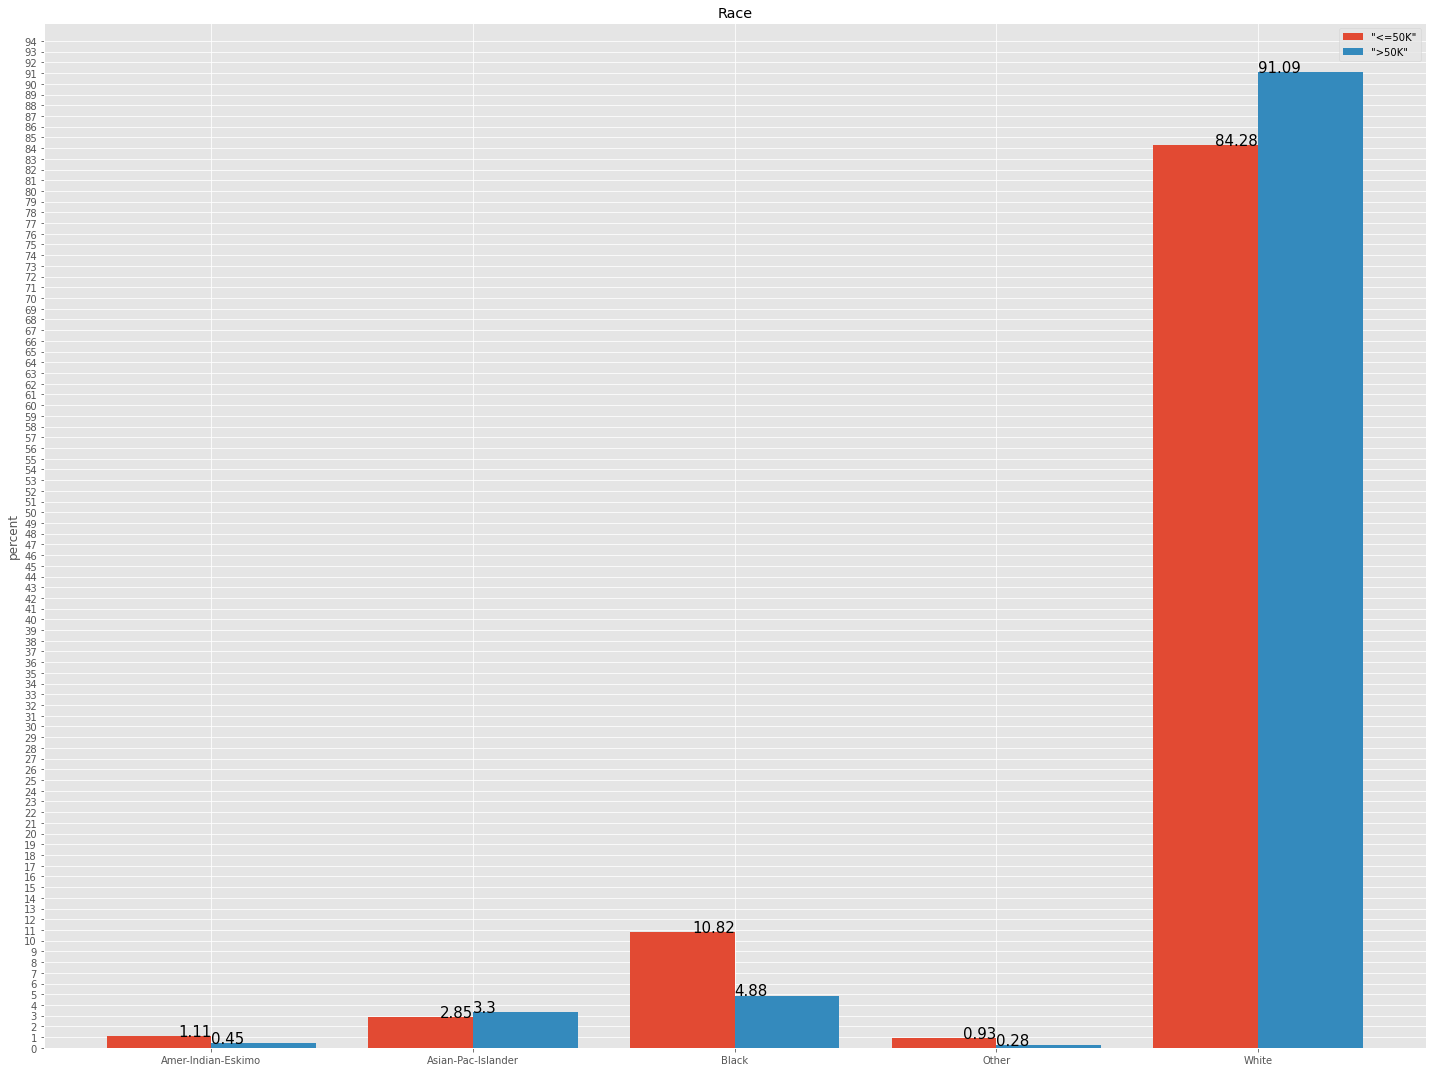

In [58]:
bar_image('race', 95, 20, 15)

"sex":

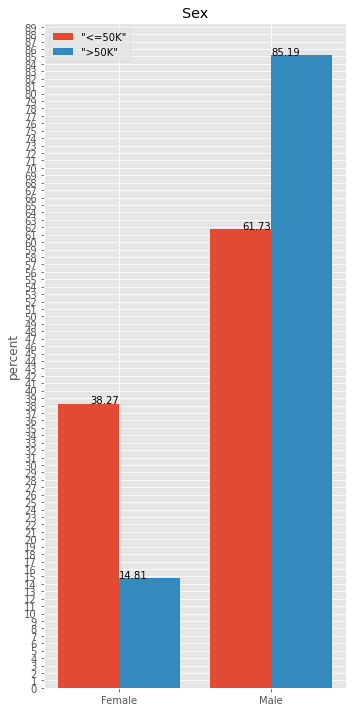

In [59]:
bar_image('sex', 90, 5, 10)

Різниця в статі простежується.

"caputal.gain":

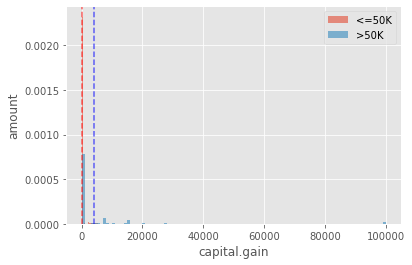

In [60]:
hist_image('capital.gain', 100)

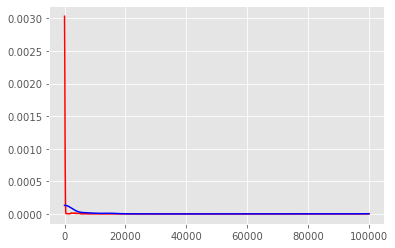

In [61]:
double_kde_image('capital.gain')

p-value > 0.05, що може свідчити про прийняття H0 про відсутність різниці.

In [62]:
df_cleaned['capital.gain'].describe()

count    30139.000000
mean      1092.841202
std       7409.110596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [63]:
df_cleaned[df_cleaned['income'] == 0]['capital.gain'].describe()

count    22633.000000
mean       149.031989
std        936.815624
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      41310.000000
Name: capital.gain, dtype: float64

In [64]:
df_cleaned[df_cleaned['income'] == 0]['capital.gain'].value_counts().sort_index()

0        21690
114          6
401          1
594         28
914          8
         ...  
7978         1
10566        6
22040        1
34095        3
41310        2
Name: capital.gain, Length: 88, dtype: int64

In [65]:
df_cleaned[df_cleaned['income'] == 0]['capital.gain'].value_counts().sort_index()[-6:-1]

7443     5
7978     1
10566    6
22040    1
34095    3
Name: capital.gain, dtype: int64

In [66]:
for i in df_cleaned[df_cleaned['income'] == 0]['capital.gain'].value_counts().sort_index()[-6:-1].index:
    df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['capital.gain'] == i].index)

In [67]:
df_cleaned[df_cleaned['income'] == 1]['capital.gain'].describe()

count     7506.000000
mean      3938.729017
std      14387.833124
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [68]:
df_cleaned[df_cleaned['income'] == 1]['capital.gain'].value_counts().sort_index()

0        5911
3103       88
4386       56
4687        3
4787       22
4934        7
5178       91
5556        4
6097        1
6418        7
6514        4
7298      240
7430        8
7688      270
7896        2
8614       52
9386       16
9562        4
10520      43
10605       9
11678       2
13550      25
14084      39
14344      26
15020       5
15024     337
15831       6
18481       2
20051      33
25124       2
25236      11
27828      32
99999     148
Name: capital.gain, dtype: int64

Перевіримо гіпотезу про однаковість закону розподілу:

In [69]:
mann_whitneyu('capital.gain')

p-value: 0.004549419623097.


Можна побачити, що розподіл відрізняється. 

Середні значення двох вибірок відрізняються.

"capital.loss":

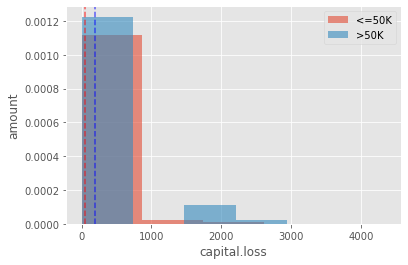

In [70]:
hist_image('capital.loss', 5)

In [71]:
df_cleaned[df_cleaned['income'] == 0]['capital.loss'].describe()

count    22617.000000
mean        53.535438
std        310.516424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

In [72]:
df_cleaned[df_cleaned['income'] == 0]['capital.loss'].value_counts().sort_index()[-8:-1]

2457    1
2467    1
2603    4
2754    2
3683    1
3770    2
3900    2
Name: capital.loss, dtype: int64

In [73]:
df_cleaned[df_cleaned['income'] == 1]['capital.loss'].describe()

count    7506.000000
mean      193.802292
std       592.896137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3683.000000
Name: capital.loss, dtype: float64

In [74]:
df_cleaned[df_cleaned['income'] == 1]['capital.loss'].value_counts().sort_index()

0       6769
653        2
1485      28
1564      24
1755       2
1825       3
1848      50
1887     155
1902     181
1977     162
2174       6
2201       1
2231       3
2246       6
2258      13
2282       1
2377       8
2392       8
2415      45
2444      12
2472       1
2547       4
2559      12
2824       8
3004       1
3683       1
Name: capital.loss, dtype: int64

In [75]:
df_cleaned[df_cleaned['income'] == 1]['capital.loss'].value_counts().sort_index()[:10]

0       6769
653        2
1485      28
1564      24
1755       2
1825       3
1848      50
1887     155
1902     181
1977     162
Name: capital.loss, dtype: int64

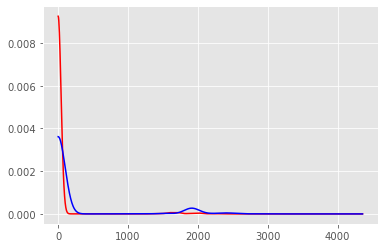

In [76]:
double_kde_image('capital.loss')

Перевіряємо гіпотезу про розподіл:

In [77]:
mann_whitneyu('capital.loss')

p-value: 0.18725508559108067.


Висновок: розподіл однаковий.

Перевіряємо гіпотезу про середні значення:

In [78]:
ranksums('capital.loss')

p-value: 0.37467793415104444.


Висновок: середні значення однакові.

Спробуємо добавити новий показник до нашої таблиці. Це буде різниця між прибутком та витратами.

In [79]:
df_cleaned['rest'] = df_cleaned['capital.gain'] - df_cleaned['capital.loss']

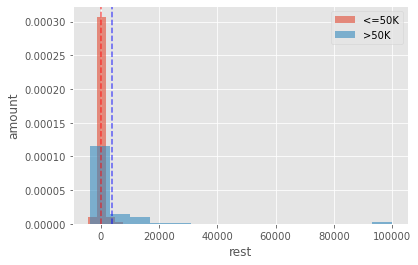

In [80]:
hist_image('rest', 15)

"hours.per.week":

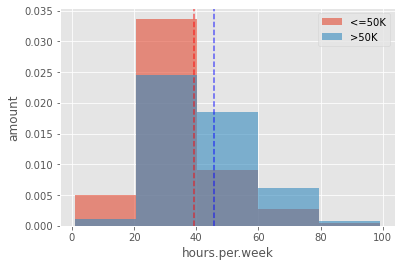

In [81]:
hist_image('hours.per.week', 5)

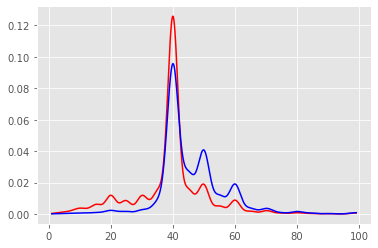

In [82]:
double_kde_image('hours.per.week')

Перевіримо гіпотезу про розподіл:

In [83]:
mann_whitneyu('hours.per.week')

p-value: 0.000279760257625317.


Гіпотезу можна відхилити.

Перевіряємо гіпотезу про рівність середніх:

In [84]:
ranksums('hours.per.week')

p-value: 0.0005679373437848791.


Висновок: приймаємо альтернативну гіпотезу.

Добавляю ще один показник, який показуватиме відношення оплати житла на місяць відносно всіз витрат.

In [85]:
df_cleaned['hours.per.week'].unique()

array([18, 40, 45, 20, 35, 55, 76, 50, 42, 25, 32, 90, 60, 48, 70, 52, 72,
       39,  6, 65, 80, 67, 99, 30, 75, 12, 26, 10, 84, 38, 62, 44,  8, 28,
       59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 15,  1, 36, 47, 68, 54,
        2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 63, 53, 96, 66, 21,
        7, 13, 27, 14, 77, 31, 78, 11, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

In [86]:
df_cleaned['capital.loss'].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2472,
       2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267, 2258,
       2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2149, 2129, 2080,
       2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944, 1902, 1887,
       1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740, 1735, 1726,
       1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617, 1602, 1594,
       1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408, 1380, 1340,
       1258, 1138, 1092,  974,  880,  810,  653,  625,  419,  323,  213,
        155,    0], dtype=int64)

In [87]:
def func(x):
    if x == 0:
        return 0
    else:
        return 1 / x

df_cleaned['cap_part_of_house'] = df_cleaned['capital.loss'] / 4 * df_cleaned['hours.per.week']
df_cleaned['cap_part_of_house'] = df_cleaned['cap_part_of_house'].apply(func)

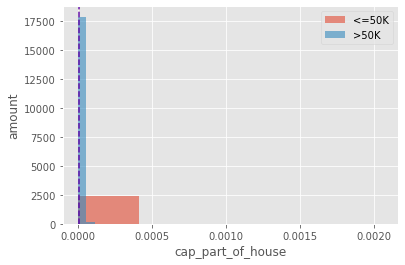

In [88]:
hist_image('cap_part_of_house', 5)

Ну і на завершення обробимо місце народження.
Для цього використовую кластерний аналіз.

Дивлюся, які країни є у переліку.

In [89]:
df_cleaned['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

Створюю окремий датафрейм зі стовпцями income та з індексами назв країн.

In [90]:
lt = np.sort(df_cleaned['native.country'].unique()).tolist()
lt_warn = ['Holand-Netherlands', 'Outlying-US(Guam-USVI-etc)', ]

incomes = df_cleaned.groupby('native.country')['income'].value_counts()

income_count0 = incomes['Cambodia'].values.reshape(1, 2)
df_country = pd.DataFrame(data=income_count0, columns=[0, 1], index=['Cambodia'])

for country in lt[1:]:
    income_count = incomes[country].values
    
    if country in lt_warn:
        income_count = np.concatenate((income_count, np.array(0)), axis=None)

    income_count = income_count.reshape(1, 2)
    income_ser = pd.DataFrame(data=income_count, columns=[0, 1], index=[country])
    df_country = pd.concat([df_country, income_ser], axis=0)
    
df_country

,0,1
Cambodia,11,7
Canada,71,36
China,48,20
Columbia,54,2
Cuba,67,25
Dominican-Republic,65,2
Ecuador,23,4
El-Salvador,91,9
England,56,30
France,15,12


In [91]:
df_country.shape[0]

41

Завантажую перший пакет для обробки

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

link = linkage(df_country, 'ward', 'euclidean')

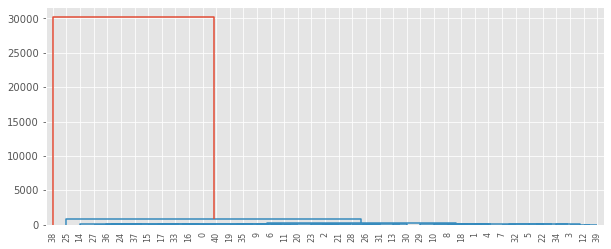

In [93]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

dn = dendrogram(link)

plt.show()

Бачу, що чітко набір може розділитися на два кластери.

In [94]:
df_country['cluster'] = fcluster(link, 10, criterion='distance')

In [95]:
df_country.groupby('cluster').mean()

,0,1
cluster,,
1,14.750000,1.750000
2,10.666667,4.166667
3,1.000000,0.000000
4,23.500000,18.500000
5,21.000000,5.666667
6,15.000000,12.000000
7,46.000000,22.000000
8,36.000000,23.000000
9,29.666667,2.666667


In [96]:
df_country.groupby('cluster').size()

cluster
1     4
2     6
3     1
4     2
5     3
6     1
7     2
8     1
9     3
10    2
11    1
12    1
13    1
14    1
15    1
16    2
17    2
18    3
19    1
20    1
21    1
22    1
dtype: int64

Для кращого аналізу підключаю метод KMeans і будую графік схилу для підбору оптимального значення кількості кластерів.

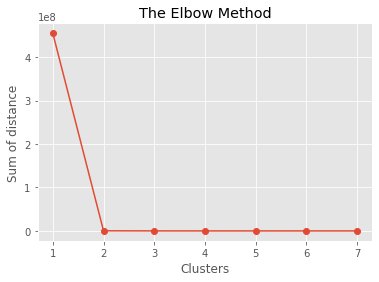

In [97]:
from sklearn.cluster import KMeans

Clusters = range(1, 8)

models = [KMeans(n_clusters=n, random_state=1).fit(df_country) for n in Clusters]
dist = [model.inertia_ for model in models]

plt.plot(Clusters, dist, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Sum of distance')
plt.title('The Elbow Method')
plt.show()

Результат графіку підтверджує попередню дендрограму.
Спробуємо навчити метод (для навчання я обрав 5, адже шляхом перевірки з моделлю Логістичної регресії даний показник оптимальний).

In [98]:
model = KMeans(n_clusters=5, random_state=1)
model.fit(df_country)

df_country['cluster'] = model.labels_
df_country.groupby('cluster').mean()

,0,1
cluster,,
0,17.904762,5.238095
1,20478.000000,6993.000000
2,573.000000,33.000000
3,100.000000,31.250000
4,56.428571,17.500000


In [99]:
df_country.groupby('cluster').size()

cluster
0    21
1     1
2     1
3     4
4    14
dtype: int64

In [100]:
df_country[df_country['cluster'] == 0].index

Index(['Cambodia', 'Ecuador', 'France', 'Greece', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'Iran', 'Ireland',
       'Laos', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Portugal',
       'Scotland', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'Yugoslavia'],
      dtype='object')

In [101]:
df_country[df_country['cluster'] == 1].index

Index(['United-States'], dtype='object')

In [102]:
df_country[df_country['cluster'] == 2].index

Index(['Mexico'], dtype='object')

In [103]:
df_country[df_country['cluster'] == 3].index

Index(['El-Salvador', 'Germany', 'Philippines', 'Puerto-Rico'], dtype='object')

In [104]:
df_country[df_country['cluster'] == 4].index

Index(['Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'England',
       'Guatemala', 'India', 'Italy', 'Jamaica', 'Japan', 'Poland', 'South',
       'Vietnam'],
      dtype='object')

Кластеризую данні таблиці.

In [105]:
country = []
for i in range(5):
    country.append(df_country[df_country['cluster'] == i].index.tolist())

def func(x):
    for i, n in enumerate(country):
        if x in n:
            return i
        continue
        
df_cleaned['native.country'] = df_cleaned['native.country'].apply(func)
df_cleaned['native.country'].unique()

array([1, 2, 0, 4, 3], dtype=int64)

# Створення моделей

Перед тим як почати роботу, щодо створення моделей необхідно активувати пакети.

In [106]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

Далі треба закінчити обробку даних для прогнозування. Для цього кодую усі номінальні та категоріальні показники.
Для статі використовую бінарний показник.

In [107]:
cls_label = LabelEncoder()

df_cleaned['sex'] = cls_label.fit_transform(df_cleaned['sex'])

Категоріальні показники кодую за допомогою векторів та видаляю першого представника для попередження виникнення колінеарності.

In [108]:
model_df = pd.get_dummies(df_cleaned, drop_first=True)

Далі розділяю набір даних для моделювання.

In [109]:
X = model_df.drop(columns='income')
y = model_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Проводжу нормалізацію усіх неперервних ознак (адже всі моделі, окрім лісів, чутливі до масштабу).

Розпочну з навчання моделі Логістичної регресії:

In [110]:
mm = MinMaxScaler() 

X_train_norm = mm.fit_transform(X_train) 
X_test_norm = mm.transform(X_test) 

In [111]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=300, random_state=1)
lr.fit(X_train_norm, y_train)

LogisticRegression(max_iter=300, random_state=1)

Створюю функцію для перевірки якості моделі:

In [112]:
def score(model_name, model, X_tr, X_t):
    test_score = accuracy_score(y_test, model.predict(X_t)) * 100
    train_score = accuracy_score(y_train, model.predict(X_tr)) * 100

    results_df = pd.DataFrame(data=[[model_name, train_score, test_score]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
    print(results_df)

In [113]:
score("Logistic Regression", lr, X_train_norm, X_test_norm)

                 Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            84.866736           84.840102


Видно, що модель дала 84.87% точності на тренувальному наборі та 84.84% на тестовому.

Спробую покращити показник з допомогою налаштування гіперпараметрів:

In [114]:
from sklearn.model_selection import GridSearchCV 

param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.05, 1, 10, 100, 1000]
param_grid = {'penalty': ['l1','l2'], 'C': param_range}

gs = GridSearchCV(estimator=LogisticRegression(max_iter=500, solver='liblinear', random_state=1),
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 refit=True,
                 n_jobs=-1)

gs.fit(X_train_norm, y_train)

print(f'Найкращий скор: {gs.best_score_}.\n')
print(f'Найкращі параметри моделі: {gs.best_params_}.')

Найкращий скор: 0.849474107084214.

Найкращі параметри моделі: {'C': 10, 'penalty': 'l2'}.


In [115]:
new_lr = LogisticRegression(max_iter=500, penalty='l2', solver='liblinear', random_state=1, C=10)
new_lr.fit(X_train_norm, y_train)

score("Logistic Regression", new_lr, X_train_norm, X_test_norm)

                 Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            85.056436           85.083545


Показники покращилися на обох вибірках.

Далі спробую використати модель методу опорних векторів:

In [116]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", random_state=1)
svc.fit(X_train_norm, y_train)

SVC(random_state=1)

In [117]:
score("SVC", svc, X_train_norm, X_test_norm)

  Model  Training Accuracy %  Testing Accuracy %
0   SVC            84.487338           84.165099


І під кінець, хочеться спробувати модель RandomForestClassifier. 

Но перед використанням знайду оптимальні показники:

In [120]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([150, 200, 250, 300])
max_features = np.array([3, 4, 5, 6, 7])

param_grid = {'n_estimators': n_estimators, 'max_features': max_features}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

print(grid.best_score_) 
print(grid.best_params_)

In [121]:
random_forest = RandomForestClassifier(max_features=5, n_estimators=200, random_state=1)
random_forest.fit(X_train, y_train)

score("RandomForest", random_forest, X_train, X_test)

          Model  Training Accuracy %  Testing Accuracy %
0  RandomForest            97.837428           84.762642


Також дана модель дозволяє визначати ступені важливості факторів:

In [122]:
feat_labels = X_train.columns

forest = RandomForestClassifier(max_depth=5, n_estimators=250, random_state=1)
forest.fit(X_train_norm, y_train)
 
importances = forest.feature_importances_ 
indices = np.argsort(importances)[::-1] 
for f in range(X_train.shape[1]): 
    print("%2d %-*s %f" % (f + 1, 30, 
        feat_labels[indices[f]], 
        importances[indices[f]])) 

 1 marital.status_Married-civ-spouse 0.208376
 2 rest                           0.162334
 3 capital.gain                   0.129143
 4 education.num                  0.085734
 5 relationship_Relative-child    0.067327
 6 marital.status_Never-married   0.063456
 7 age                            0.055066
 8 relationship_Not-in-family     0.030107
 9 hours.per.week                 0.025373
10 capital.loss                   0.023189
11 sex                            0.021535
12 education_Step                 0.019095
13 education_Bachelors            0.016638
14 occupation_Exec-managerial     0.014467
15 education_School               0.014145
16 occupation_Prof-specialty      0.013325
17 lvl_edu                        0.012069
18 education_Masters              0.009456
19 relationship_Wife              0.008369
20 cap_part_of_house              0.004130
21 education_HS-grad              0.003740
22 occupation_Other-service       0.003665
23 workclass_Self-emp-inc         0.002158
24 educa

Можна побачити, які показники найбільше впливають на прогноз класифікаційної моделі.

In [124]:
import session_info

session_info.show()